In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_excel("C:/Users/yesh/Desktop/ai-ml_class/ai-ml_notes/performance metics/Linear Regression.xlsx",sheet_name=0)

In [5]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [7]:
data.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


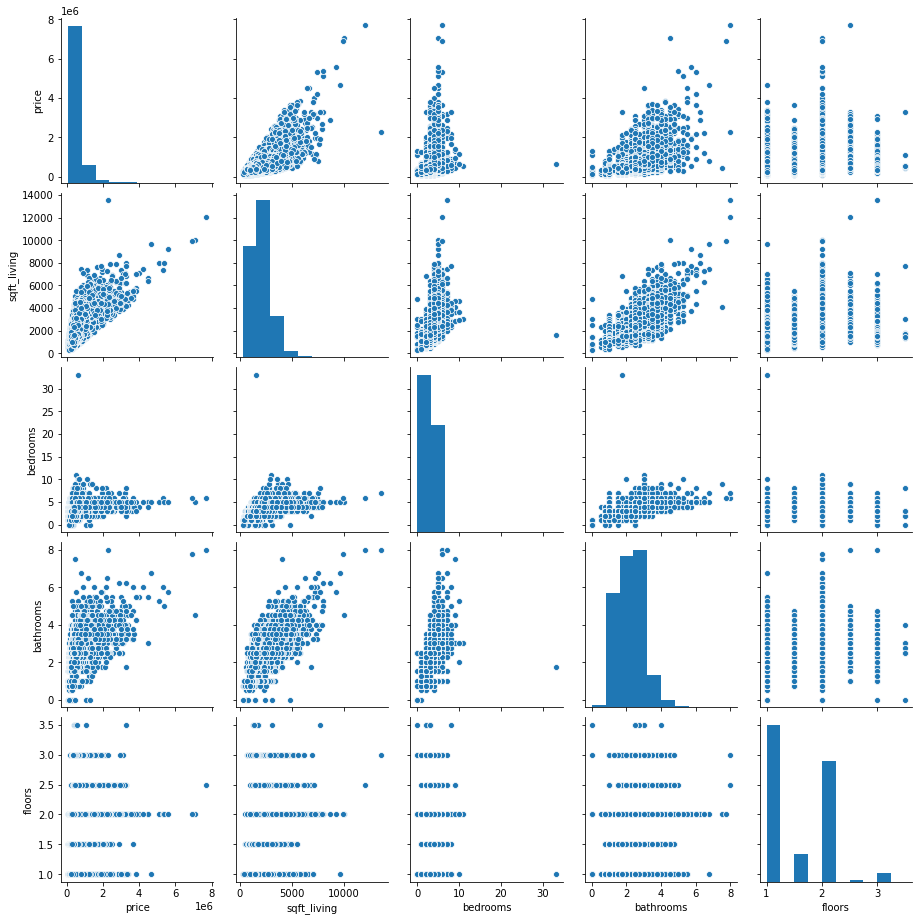

In [8]:
sns.pairplot(data)

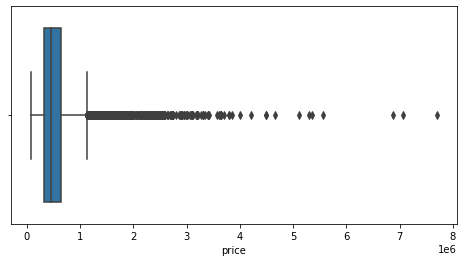

In [10]:
fig,ax=plt.subplots(figsize=(8,4))
sns.boxplot(data['price'],ax=ax)

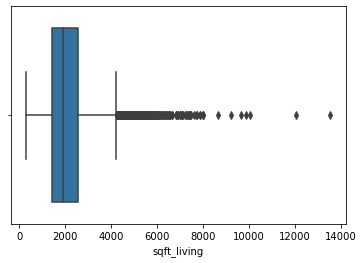

In [11]:
sns.boxplot(data['sqft_living'])

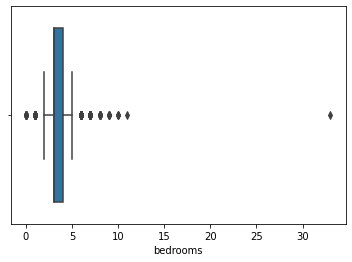

In [12]:
sns.boxplot(data['bedrooms'])

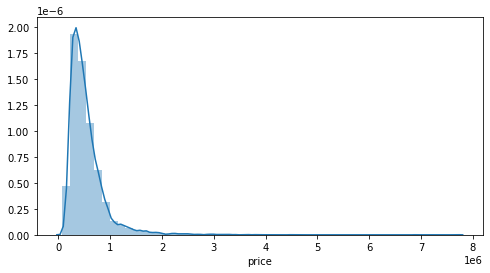

In [15]:
fig,ax=plt.subplots(figsize=(8,4))
sns.distplot(data.price,ax=ax)

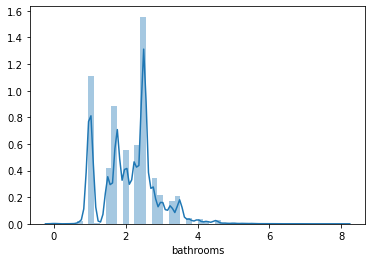

In [16]:
sns.distplot(data.bathrooms)

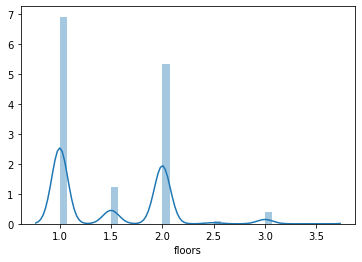

In [17]:
sns.distplot(data.floors)

# Data Visualization Inferences
1) The dependent variable price is unimodal,left skewed and has many outliers.

2) The independent variable area of living in square feet is unimodal,left skewed and has many outliers.

3) The independent variable number of bedrooms is multimodal and has moderate outliers.

4) The independent variable number of bathrooms is multimodal and has moderate outliers.

5) The independent variable number of floors is multimodal and has no outliers.

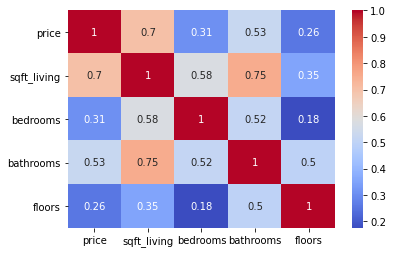

In [18]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

# Correlation Inferences
The target variable price has good correlation with area of living in square feet and moderate correlation with number of bathrooms and bedrooms and almost no correlation with number of floors.

## Model 1
Price as dependent variable and area of living in square feet as independent variable. Since both the variables are continuous a simple linear regression model is used.

## Splitting the dataset into training and testing data

In [19]:
y=data.iloc[:,:1]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [20]:
x=data.iloc[:,1:2]
x.head()


,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)



In [25]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [26]:
ypred=lin_reg.predict(x_test)
ypred

array([[ 360116.30918286],
       [1261900.99730684],
       [ 362899.59525731],
       ...,
       [ 560512.90654374],
       [ 374032.73955514],
       [ 329500.16236383]])

In [27]:
from sklearn.metrics import r2_score,mean_squared_error
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)
print("Root mean square error is......",RMSE)
print("r square value is......",r_square)

Root mean square error is...... 264896.2296616816
r square value is...... 0.488899283822523
